In [1]:
import pandas as pd
data = pd.read_csv('data/分类2.csv')
features = data[data.columns[0:4]]
features.sample(10)

客户价值等级        资产总额       基金金额    预测需求
3952       6  1165739.81  203345.71  139328
3469       5   792712.81   75684.79    8793
3532       5   530709.92   76844.12   80200
1192       4   142127.74   38431.54   13562
2219       4   479378.66  340971.01  222114
1478       2    15172.88   14676.64    8527
3599       5   548542.76   10975.29   54838
1154       6  1105435.38  445444.24  227829
4233       6  1828151.38   42025.25   84057
3852       5   779175.13   12410.74      90

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
#scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
pca = PCA(n_components=2).fit(features)
features_2d = pca.transform(features)
features_2d[0:10]

array([[ 1.61655479e+05, -1.45997885e+05],
       [-3.38311775e+05, -6.25812067e+04],
       [ 8.50264719e+05,  2.53515984e+05],
       [-1.58642014e+05,  2.33540010e+05],
       [ 2.02484929e+04,  3.60759988e+05],
       [-4.68695020e+05,  1.18690732e+02],
       [-4.62281120e+05,  6.15044664e+03],
       [-4.52731995e+05,  1.14081058e+04],
       [-4.92474875e+05, -1.79619633e+04],
       [-5.15724076e+05, -3.74623193e+04]])

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
pca = PCA(n_components=2).fit(scaled_features)
features2d = pca.transform(scaled_features)
features2d[0:10]

array([[ 0.26426383,  0.13824506],
       [-0.13679025, -0.10054831],
       [ 0.70356568,  0.40936368],
       [ 0.04023955,  0.32794912],
       [ 0.14193665,  0.53070791],
       [-0.34010333,  0.02940676],
       [-0.33593753,  0.03825183],
       [-0.33028849,  0.04963368],
       [-0.35371546,  0.0021243 ],
       [-0.5665544 ,  0.04203819]])

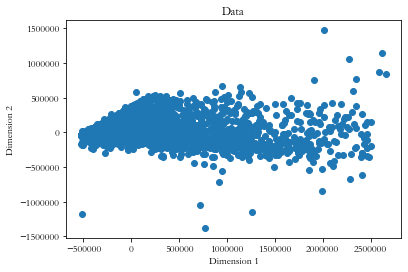

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

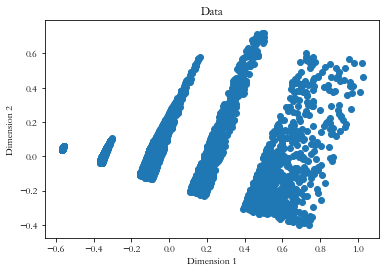

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(features2d[:,0],features2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

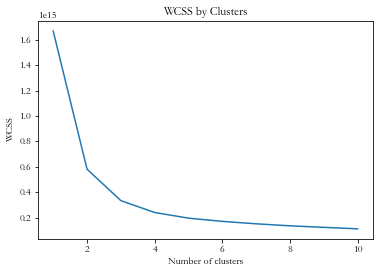

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(features.values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
km_clusters = model.fit_predict(features.values)
km_clusters

array([2, 0, 2, ..., 1, 1, 1], dtype=int32)

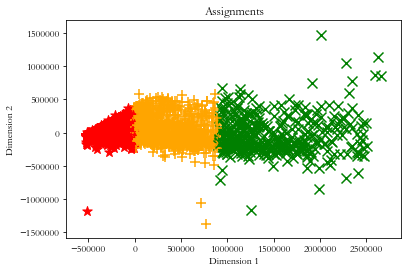

In [8]:
def plot_clusters(samples, clusters):
    col_dic = {0:'red',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()
plot_clusters(features_2d, km_clusters)

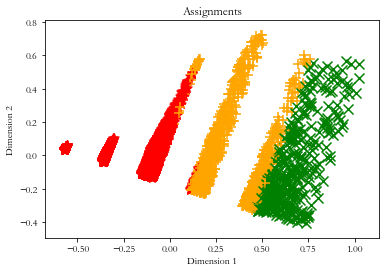

In [9]:
def plot_clusters(samples, clusters):
    col_dic = {0:'red',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()
plot_clusters(features2d, km_clusters)

In [10]:
import pandas as pd
a = [x for x in km_clusters]
dataframe = pd.DataFrame({'level':a})
#将DataFrame存储为csv
dataframe.to_csv("等级.csv",index=False)

In [12]:
import pandas as pd
data = pd.read_csv('data/分类.csv')
data.head()

客户价值等级        资产总额       基金金额    预测需求  等级
0       5   692472.15  247635.98 -202719   0
1       4   185912.38   11097.96    -218   1
2       6  1315984.36  500332.84  229196   0
3       4   320695.94  308277.39  170458   1
4       4   479222.44  452859.42  249117   0

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [14]:
corr = data.corr()
corr

客户价值等级      资产总额      基金金额      预测需求        等级
客户价值等级  1.000000  0.837640  0.438301  0.378750 -0.172950
资产总额    0.837640  1.000000  0.405471  0.443135  0.147828
基金金额    0.438301  0.405471  1.000000  0.558255 -0.123346
预测需求    0.378750  0.443135  0.558255  1.000000  0.052258
等级     -0.172950  0.147828 -0.123346  0.052258  1.000000

In [9]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, '年龄'),
  Text(0, 1.5, '基金资产比'),
  Text(0, 2.5, '客户价值等级'),
  Text(0, 3.5, '资产负债率'),
  Text(0, 4.5, '基金金额'),
  Text(0, 5.5, '预测需求'),
  Text(0, 6.5, 'level')])

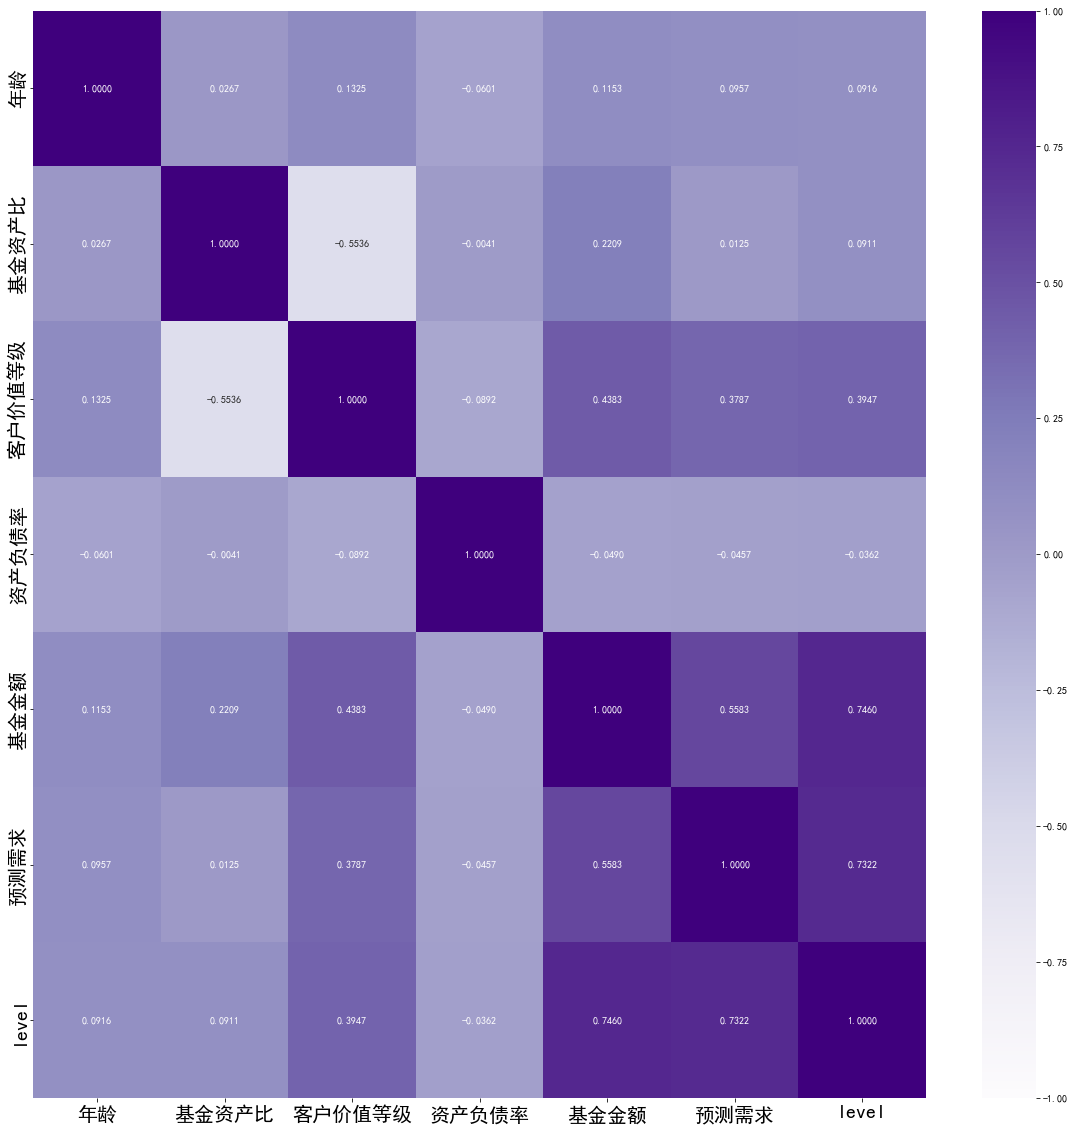

In [11]:
ax = plt.subplots(figsize=(20, 20))#调整画布大小
ax = sns.heatmap(corr,annot=True,fmt='.4f',cmap='Purples',vmax=1, vmin=-1)
# 设置刻度字体大
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)